### I would like to know
how many images inside th UTKFace dataset are grayscale images, i.e. having only 1 channel. And which are they, and eventually deleting them all.

#### Well...
It seems that all of them has 3 channels, just that some of them has the RGB overall effect that looks like that of a grayscale image.

#### So, now the question becomes how to identify these "fake" RGB's?

In [1]:
!ls

asian-from-UTKFace  investigate-UTKFace-grey.ipynb  UTKFace-clean
caution-CACD2000    stat-AGFW.md		    UTKFace-clean-13plus
celebA		    stat-CACD2000.md		    UTKFace-deleted-flist.txt
FGNET		    stat-FGNET.md		    UTKFace-README.md
imdb-wiki-face	    urls


In [73]:
import os
from PIL import Image as pil_image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image as ipython_image
import time

In [3]:
gray_img = pil_image.open("UTKFace-clean-13plus/14_1_0_20170109214440556.jpg.chip.jpg")
gray_array = np.array(gray_img)
gray_array.shape

(200, 200, 3)

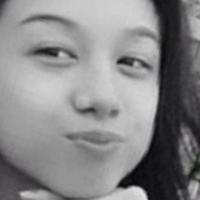

In [4]:
gray_img

In [5]:
np.array_equal(gray_array[...,0], gray_array[...,1])

False

In [53]:
np.array_equal(gray_array[...,1], gray_array[...,2])

False

In [52]:
np.array_equal(gray_array[...,0], gray_array[...,2])

False

In [54]:
gray_array[...,0]

array([[ 43,  46,  49, ..., 138, 151, 168],
       [ 44,  47,  52, ..., 125, 140, 157],
       [ 46,  51,  58, ..., 113, 127, 142],
       ...,
       [ 81,  81,  83, ..., 125, 128, 134],
       [ 81,  82,  85, ..., 128, 136, 144],
       [ 81,  83,  86, ..., 131, 143, 153]], dtype=uint8)

In [55]:
gray_array[...,1]

array([[ 43,  46,  49, ..., 138, 151, 168],
       [ 44,  47,  52, ..., 125, 140, 157],
       [ 46,  51,  58, ..., 113, 127, 142],
       ...,
       [ 79,  79,  81, ..., 123, 126, 132],
       [ 79,  80,  83, ..., 126, 134, 142],
       [ 79,  81,  84, ..., 129, 141, 151]], dtype=uint8)

In [8]:
gray_array[...,2]

array([[ 45,  48,  51, ..., 138, 151, 168],
       [ 46,  49,  54, ..., 125, 140, 157],
       [ 48,  53,  60, ..., 113, 127, 142],
       ...,
       [ 82,  82,  84, ..., 126, 129, 135],
       [ 82,  83,  86, ..., 129, 137, 145],
       [ 82,  84,  87, ..., 132, 144, 154]], dtype=uint8)

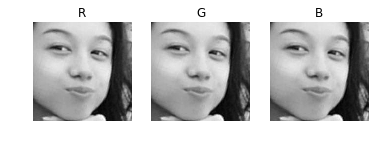

In [64]:
plt.subplot(131)
plt.imshow(gray_array[...,0], cmap='gray')
plt.axis('off')
plt.title('R')
plt.subplot(132)
plt.imshow(gray_array[...,1], cmap='gray')
plt.axis('off')
plt.title('G')
plt.subplot(133)
plt.imshow(gray_array[...,2], cmap='gray')
plt.axis('off')
plt.title('B');


In [31]:
color_img = pil_image.open("UTKFace-clean-13plus/14_1_0_20170109214635943.jpg.chip.jpg")
color_array = np.array(color_img)
color_array.shape

(200, 200, 3)

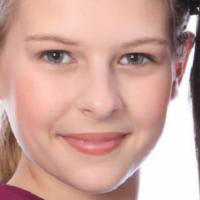

In [61]:
color_img

In [21]:
color_array[...,0]

array([[168, 180, 180, ...,  38,  34,  35],
       [164, 183, 187, ...,  25,  29,  33],
       [156, 181, 186, ...,  27,  32,  33],
       ...,
       [143, 143, 141, ..., 252, 255, 228],
       [143, 143, 141, ..., 252, 254, 226],
       [143, 143, 141, ..., 253, 252, 223]], dtype=uint8)

In [22]:
color_array[...,1]

array([[142, 154, 152, ...,  32,  28,  29],
       [138, 157, 159, ...,  19,  23,  27],
       [130, 155, 158, ...,  21,  26,  27],
       ...,
       [ 42,  42,  42, ..., 252, 253, 226],
       [ 42,  42,  42, ..., 252, 252, 224],
       [ 42,  42,  42, ..., 253, 250, 221]], dtype=uint8)

In [23]:
color_array[...,2]

array([[143, 155, 151, ...,  36,  32,  33],
       [139, 158, 158, ...,  23,  27,  31],
       [131, 156, 157, ...,  25,  30,  31],
       ...,
       [ 86,  86,  86, ..., 252, 254, 227],
       [ 86,  86,  86, ..., 252, 253, 225],
       [ 86,  86,  86, ..., 253, 251, 222]], dtype=uint8)

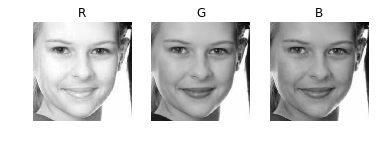

In [63]:
plt.subplot(131)
plt.imshow(color_array[...,0], cmap='gray')
plt.axis('off')
plt.title('R')
plt.subplot(132)
plt.imshow(color_array[...,1], cmap='gray')
plt.axis('off')
plt.title('G')
plt.subplot(133)
plt.imshow(color_array[...,2], cmap='gray')
plt.axis('off')
plt.title('B');

### According to our observations above
Color images which look more like grayscale have their 3 channels almost identical whereas true color images allow us to easily see the differences btw their 3 channels.

Let's try and define some sort of a distance function btw the different channels of an image and see if grayscale images have smaller values for such a distance.

In [65]:
def channel_diff(img_array):
    """
    Input:
        img_array, ndarray
            channel order (R, G, B)

    Return:
        res, tuple
    """
    img_array = img_array.astype(np.float32)
    RG_diff = img_array[..., 0] - img_array[..., 1]
    GB_diff = img_array[..., 1] - img_array[..., 2]
    RB_diff = img_array[..., 0] - img_array[..., 2]
    res = (np.max(np.abs(RG_diff)),
           np.max(np.abs(GB_diff)),
           np.max(np.abs(RB_diff)),)
    return res

In [66]:
print(channel_diff(gray_array))

(5.0, 6.0, 5.0)


In [67]:
print(channel_diff(color_array))

(106.0, 44.0, 104.0)


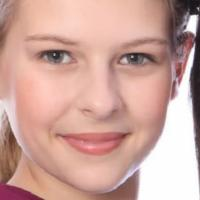

In [72]:
ipython_image("UTKFace-clean-13plus/14_1_0_20170109214635943.jpg.chip.jpg")

In [79]:
plt.imread("UTKFace-clean-13plus/14_1_0_20170109214635943.jpg.chip.jpg").dtype

dtype('uint8')

In [80]:
np.array_equal(plt.imread("UTKFace-clean-13plus/14_1_0_20170109214635943.jpg.chip.jpg"), color_array)

True

### Let's change
`channel_diff()` a little bit to have it return a single number instead of a tuple, so that I can do the subsequent experiment of collecting all those I suspect being grayscale into a new folder.

In [94]:
def channel_diff(img_array):
    """
    Input:
        img_array, ndarray
            channel order (R, G, B)

    Return:
        res, float
    """
    img_array = img_array.astype(np.float32)
    RG_diff = img_array[..., 0] - img_array[..., 1]
    GB_diff = img_array[..., 1] - img_array[..., 2]
    RB_diff = img_array[..., 0] - img_array[..., 2]
    res = np.max([np.max(np.abs(RG_diff)),
                  np.max(np.abs(GB_diff)),
                  np.max(np.abs(RB_diff)),])
    return res

### The next cell may take long to complete
If you don't want that long and don't need that result (i.e. if you only want to check your filtered grayscale images and not want to check those other remaining images), try run the cell beneath it instead.

In [98]:
thresholds = [10, 35, 45]
# Create folders to put the images in if they do not exist already.
for thres in thresholds:
    thres_folder = "thres-"+str(thres)
    serht_folder = "serht-"+str(thres)  # the complement of thres_folder
    if not os.path.exists(thres_folder):
        os.mkdir(thres_folder)
    if not os.path.exists(serht_folder):
        os.mkdir(serht_folder)

utk_folder = "UTKFace-clean-13plus"
for fname in os.listdir(utk_folder):
    fpath = os.path.join(utk_folder, fname)
    img_array = plt.imread(fpath)
    critical_value = channel_diff(img_array)
    for thres in thresholds:
        if critical_value < thres:
            thres_folder = "thres-"+str(thres)
            plt.imsave(os.path.join(thres_folder, fname), img_array)
        else:
            serht_folder = "serht-"+str(thres)
            plt.imsave(os.path.join(serht_folder, fname), img_array)

In [ ]:
thresholds = [10, 35, 45]
# Create folders to put the images in if they do not exist already.
for thres in thresholds:
    thres_folder = "thres-"+str(thres)
    #serht_folder = "serht-"+str(thres)  # the complement of thres_folder
    if not os.path.exists(thres_folder):
        os.mkdir(thres_folder)
    #if not os.path.exists(serht_folder):
    #    os.mkdir(serht_folder)

utk_folder = "UTKFace-clean-13plus"
for fname in os.listdir(utk_folder):
    fpath = os.path.join(utk_folder, fname)
    img_array = plt.imread(fpath)
    critical_value = channel_diff(img_array)
    for thres in thresholds:
        if critical_value < thres:
            thres_folder = "thres-"+str(thres)
            plt.imsave(os.path.join(thres_folder, fname), img_array)
        #else:
        #    serht_folder = "serht-"+str(thres)
        #    plt.imsave(os.path.join(serht_folder, fname), img_array)
